In [2]:
# Fit notebook to browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import ROOT
import math 
import time
import os
import numpy as np
from array import array
import uproot
import pandas as pd

Welcome to JupyROOT 6.22/02


In [4]:
# Get input TTree
dir_in = '/grid_mnt/vol_home/llr/cms/portales/HIGtrigger/higgs-trigger-nanoaod/CMSSW_10_6_18/src/higgs-trigger-nanoaod/VBFparking_scripts/'

DFs = {}

#file_in3 = dir_in + 'VBFbb_Summer23_histo.nomutrg.root'
#file_in3 = dir_in + 'outputs/VBFHinv_Summer23withPU.root'
#the_tree3 = uproot.open(file_in3)['VBFNanoAOD/VBFtree']
#df3 = ROOT.RDataFrame('VBFNanoAOD/VBFtree',file_in3)
#
file_in3 = dir_in + 'outputs/Run23all_VBFall.fixL1.root'
the_tree3 = uproot.open(file_in3)['VBFNanoAOD/VBFtree']
df3 = ROOT.RDataFrame('VBFNanoAOD/VBFtree',file_in3)



DFs['23mc'] = df3



In [5]:
ROOT.gInterpreter.Declare('''
float get_pu_weight(Float_t pu,int mode) {

    int trunc_pu = trunc(pu);

    // from https://twiki.cern.ch/twiki/bin/view/CMS/PileupJSONFileforData#Recommended_cross_section
    // Summer23BPix values
    Float_t bin_content[99] = {0.7532464489907519, 1.8040668118129246, 1.1089130741582072, 1.1553987552256275, 1.245728417276371, 1.1937932935125917, 1.2453613860148154, 1.2736092836559791, 1.2082126210204585, 1.132703036479394, 1.2521856885923721, 1.2720985791267385, 0.8914416798569195, 1.7052365088521522, 2.4530562004616483, 3.633762107702425, 3.8788825208908566, 2.8555729532793124, 2.236104475467844, 2.018753453549372, 1.9462220721615078, 1.9533224472401223, 2.118933391461176, 2.3891799630381647, 2.5490098294923014, 2.557414095570642, 2.4397676969125532, 2.26564516461865, 2.043064836103502, 1.8178050547424613, 1.6877429286800028, 1.5923686114854123, 1.5194484244872075, 1.475778282498225, 1.4410654767783873, 1.3894800830618137, 1.3352307979042994, 1.2953977340867395, 1.2687561005394792, 1.2647950710168805, 1.267203346773791, 1.273118979714938, 1.3082591301322026, 1.357697563293216, 1.4190713545603486, 1.492446698791432, 1.5554020388862215, 1.6078105671666234, 1.6353594032493235, 1.6216132258852947, 1.6011592292446848, 1.5392282536558162, 1.4328807920513436, 1.307090901583802, 1.1456224051848953, 0.974414368665831, 0.8207154384945944, 0.686570432063826, 0.5725635021118742, 0.47401419082261476, 0.39321881790705865, 0.3200443198866921, 0.26023829173503593, 0.21447458785471663, 0.1770112070705661, 0.1438528883634869, 0.11697734246183061, 0.09614360862784116, 0.07997138054349114, 0.06735271297948425, 0.05527480866127074, 0.04600135647462725, 0.038460580104617864, 0.03220381663863499, 0.028520624998853276, 0.0243541268835824, 0.021352425116347988, 0.01938973859535057, 0.01819803472376748, 0.018406631030684645, 0.02173843229873716, 0.025736541407498106, 0.025374311829527707, 0.022848507889268146, 0.02162946428356669, 0.018398066778495255, 0.01568100260276304, 0.012790267772075498, 0.009529707964252718, 0.009360909555722071, 0.006445078482684366, 0.004342289085182549, 0.0039305561479253005, 0.003905627095824711, 0.03198553904154048, 0.0323160237716993, 0.0554532497873254, 1.0, 1.0};
    // Summer23 values 
    Float_t bin_content2[99]= {0.5591752843352855, 1.0984591182489858, 1.1515840150078767, 1.1674049628353345, 1.184753545509311, 1.2130016777547084, 1.1690577716285582, 1.1806345357156027, 1.2080470279070723, 1.1999687392225749, 1.2372648752016588, 1.2604697717047129, 1.3358215142429641, 1.519422934361555, 1.700167965056459, 1.6947247640342962, 1.734809330239577, 1.8543355546343705, 2.224927619459479, 2.7552810141117, 3.067434422907922, 3.0076049441166917, 2.8651137188381477, 2.786579569606092, 2.725019499794993, 2.664710660253535, 2.5226649667529295, 2.32091805804617, 2.10258280293077, 1.932397284789287, 1.8068975671553478, 1.6996827252807605, 1.6073400421655377, 1.5279433190208147, 1.4684310627328327, 1.416622791430471, 1.375670876430714, 1.3552674655892403, 1.3436877112489363, 1.3406998865168107, 1.3507991265877768, 1.3763748079517872, 1.410061918847474, 1.4513660128294221, 1.508457109861666, 1.5610155419479599, 1.6070489019897998, 1.622502915070186, 1.6144030798383469, 1.5634242997956662, 1.4795626924512317, 1.3733566424083434, 1.2289081415014453, 1.0731976294815964, 0.9185936823017935, 0.7646733522712394, 0.6276050785550459, 0.5096528623122277, 0.41526002915320187, 0.3407345642323754, 0.28304430917583934, 0.24066071485096632, 0.20750750317220992, 0.18076821124401163, 0.1584770964099369, 0.14010125423583417, 0.12476138143409957, 0.11146294163230867, 0.09979047594976527, 0.08975790720178098, 0.08232012633290663, 0.07659814140367188, 0.07297622116981878, 0.06969624680212497, 0.06334237075858075, 0.057249816177426034, 0.05096657216607343, 0.04430982570589347, 0.04034644814795207, 0.037360630708771, 0.03483928585944697, 0.03414629121176639, 0.03614384739652237, 0.04347133896203043, 0.05554204016709964, 0.06621297854626676, 0.07684110029305186, 0.08135980551251665, 0.10208490488048604, 0.15720437806261356, 0.31465343852260447, 0.8727021766035887, 12.10733809629906, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0};

    Float_t wbpix = 9.525/(27.207);
    Float_t w = 1. - wbpix;
    
    if(mode==0)
        return wbpix*bin_content[trunc_pu]+w*bin_content2[trunc_pu];
    else if(mode==1)
        return bin_content[trunc_pu];
    else if(mode==2)
        return bin_content2[trunc_pu];
    else
        return 0;
}
'''
)



True

In [6]:
# highest mjj among all jet pairs (with pT>60 GeV, id tight) + additional variables for VBF jets
ROOT.gInterpreter.Declare('''
float get_VBF_var(TString var,
                  ROOT::VecOps::RVec<Float_t> pt,
                  ROOT::VecOps::RVec<Float_t> eta,
                  ROOT::VecOps::RVec<Float_t> phi,
                  ROOT::VecOps::RVec<Float_t> id,
                  ROOT::VecOps::RVec<Float_t> chf,
                  Float_t pt1cut,
                  Float_t pt2cut,
                  Float_t idcut,
                  Bool_t CHFcut) {
    
    Double_t mjj      = -1;
    Double_t detajj   = -1;
    Double_t etabest  = -999;
    Double_t etabest2 = -999;
    Double_t ptbest  = -999;
    Double_t ptbest2 = -999;
    Double_t chfbest  = -1;
    Double_t chfbest2 = -1;
    
    const auto size = pt.size();
    for (size_t idx1=0; idx1<size; ++idx1){
        for (size_t idx2=0; idx2<idx1; ++idx2){
        
            // VBF jets have to pass the ptcut2
            if (pt[idx1]<pt2cut || pt[idx2]<pt2cut)
                continue;
                           
            // in any case, we want tightly ID'd jets (just a safety, the condition should never be true)
            if (id[idx1]<idcut || id[idx2]<idcut)
                continue;

            // if CHFcut requirement is requested, check that both jets verify it
            if (CHFcut && ((abs(eta[idx1])<2.5 && chf[idx1]<0.5) ||
                           (abs(eta[idx2])<2.5 && chf[idx2]<0.5)   ))
                continue;

            // if minimal selection applies, get the jets 4-vec
            ROOT::Math::PtEtaPhiMVector p1(pt[idx1], eta[idx1], phi[idx1], 0.);
            ROOT::Math::PtEtaPhiMVector p2(pt[idx2], eta[idx2], phi[idx2], 0.);
            
            // check if the pair has best mjj, if so store VBF jets quantities
            if ((p1+p2).mass() > mjj) {
                mjj      = (p1+p2).mass();
                detajj   = abs(eta[idx1]-eta[idx2]);
                etabest  = (p1.pt()>p2.pt()) ? p1.eta():p2.eta();
                etabest2 = (p1.pt()>p2.pt()) ? p2.eta():p1.eta();
                ptbest   = (p1.pt()>p2.pt()) ? p1.pt():p2.pt();
                ptbest2  = (p1.pt()>p2.pt()) ? p2.pt():p1.pt();
                chfbest  = (p1.pt()>p2.pt()) ? chf[idx1]:chf[idx2];
                chfbest2 = (p1.pt()>p2.pt()) ? chf[idx2]:chf[idx1];
            }
        }
    }
    if (var=="mjj") 
        return mjj;
    if (var=="detajj")
        return detajj;
    if (var=="eta")
        return etabest;
    if (var=="eta2")
        return etabest2;
    if (var=="pt")
        return ptbest;
    if (var=="pt2")
        return ptbest2;
    if (var=="chf")
        return chfbest;
    if (var=="chf2")
        return chfbest2;
        
    return -999.;
}
'''
)

True

In [7]:
# highest mjj among all jet pairs (with pT>60 GeV, id tight) + additional variables for VBF jets
ROOT.gInterpreter.Declare('''
bool pass_pt_cut(ROOT::VecOps::RVec<Float_t> pt,
                  Float_t pt1cut,
                  Float_t pt2cut,
                  Bool_t nopt1cut,
                  Bool_t nopt2cut) {
        
    Double_t mjj      = -1;
    int idx_vbf1 = -1;
    int idx_vbf2 = -1;
    
    if (pt[0]<pt1cut && !nopt1cut) // 1 jet with pT > ptcut1 (HLT logic)
        return false;
      
    if (pt[1]<pt2cut && !nopt2cut) // 2 jets with pT > ptcut2 (HLT logic)
        return false;
    
    return true;
}
'''
)

True

In [8]:
# checking cuts to measure eff vs mjj
ROOT.gInterpreter.Declare('''
bool pass_VBF_cuts(TString plotvar,
                   ROOT::VecOps::RVec<Float_t> pt,
                   ROOT::VecOps::RVec<Float_t> eta,
                   ROOT::VecOps::RVec<Float_t> phi,
                   ROOT::VecOps::RVec<Float_t> id,
                   ROOT::VecOps::RVec<Float_t> chf,
                   Float_t pt1cut,
                   Float_t pt2cut,
                   Float_t mjjcut,
                   Float_t detajjcut,
                   Bool_t CHFcut,
                   Bool_t nopt1cut,
                   Bool_t nopt2cut) {
                   
    Bool_t pass = true;
    
    // check pt cuts
    pass = pass && (pass_pt_cut(pt,pt1cut,pt2cut,nopt1cut,nopt2cut) 
                    || plotvar=="pt2" || plotvar=="pt1");

    // check detajj cut
    pass = pass && (detajjcut < get_VBF_var("detajj",pt,eta,phi,id,chf,pt1cut,pt2cut,6,CHFcut) 
                    || plotvar=="detajj");

    // check mjj cut
    pass = pass && (mjjcut < get_VBF_var("mjj",pt,eta,phi,id,chf,pt1cut,pt2cut,6,CHFcut)
                    || plotvar=="mjj");


    return pass;
}
''')

True

In [9]:
def fill_eff(h_num, h_den, year,var,version):
    eff = ROOT.TGraphAsymmErrors(h_num[year][var][version].GetValue(),
                                 h_den[year][var].GetValue(),
                                 'eff_{}'.format(var))
    return eff


def redrawBorder():
    ROOT.gPad.Update()
    ROOT.gPad.RedrawAxis()
    l = ROOT.TLine()
    l.SetLineWidth(2)
    l.DrawLine(ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymax(), ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymax())
    l.DrawLine(ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymin(), ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymax())
    l.DrawLine(ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymin(), ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymax())
    l.DrawLine(ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymin(), ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymin())

def print_unique_runs(df):
    df_runs = df.AsNumpy(["run"])
    np.unique(df_runs['run'])
    for run in np.unique(df_runs['run']):
        print(run)

In [129]:
periods = ['23mc']

#pt1cut = 125.
#pt2cut = 50.
#mjjcut = 1100.
#detajjcut = 4.0

#pt1cut = 135.
#pt2cut = 60.
#mjjcut = 1500.
##mjjcut = 1000.
#detajjcut = 4.0


pt1cut = 150.
pt2cut = 70.
mjjcut = 1500.
#mjjcut = 1000.
detajjcut = 0.0

idcut = 6
chfcut = "true"

df_mjj_all = {}

# apply basic filter & evaluate variables
for year in periods:
    
    # always apply pT requirement
    cut_df = DFs[year]#.Filter('jets_pt[0]>{} && jets_pt[1]>{}'.format(pt1cut,pt2cut))
    
    
#    df_mjj_all[year] = cut_df\
#                    .Define('mjj2',    'get_VBF_var( "mjj", jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
#                    .Define('chfbest', 'get_VBF_var( "chf", jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
#                    .Define('chfbest2','get_VBF_var( "chf2",jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
#                    .Define('etabest', 'get_VBF_var( "eta", jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
#                    .Define('etabest2','get_VBF_var( "eta2",jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
#                    .Define('ptbest',  'get_VBF_var( "pt",  jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
#                    .Define('ptbest2', 'get_VBF_var( "pt2", jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
#                    .Define('puweight_comb','get_pu_weight(npu,0)') \
#                    .Define('puweight_bpix','get_pu_weight(npu,1)') \
#                    .Define('puweight_nobpix','get_pu_weight(npu,2)') \
#                    .Define('Detajj',  'abs(etabest-etabest2)')
    
    df_mjj_all[year] = cut_df\
                    .Define('mjj2',    'get_VBF_var( "mjj", jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
                    .Define('chfbest', 'get_VBF_var( "chf", jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
                    .Define('chfbest2','get_VBF_var( "chf2",jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
                    .Define('etabest', 'get_VBF_var( "eta", jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
                    .Define('etabest2','get_VBF_var( "eta2",jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
                    .Define('ptbest',  'get_VBF_var( "pt",  jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
                    .Define('ptbest2', 'get_VBF_var( "pt2", jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{})'.format(pt1cut,pt2cut,idcut,chfcut))\
                    .Define('Detajj',  'abs(etabest-etabest2)')

In [130]:
h_test_now = df_mjj_all[year].Histo1D(    ('h_test','',   99,0,99.),'npu')
h_test_w0 = df_mjj_all[year].Histo1D(    ('h_test','',   99,0,99.),'npu', 'puweight_comb')
h_test_w1 = df_mjj_all[year].Histo1D(    ('h_test','',   99,0,99.),'npu', 'puweight_bpix')
h_test_w2 = df_mjj_all[year].Histo1D(    ('h_test','',   99,0,99.),'npu', 'puweight_nobpix')

canv=ROOT.TCanvas("bla","test")
canv.cd()
h_test_w0.Draw("hist")
h_test_w1.SetLineColor(2)
h_test_w1.Draw("hist same")
h_test_w2.SetLineColor(3)
h_test_w2.Draw("hist same")
h_test_now.Draw("same e")
canv.Draw()

TypeError: Template method resolution failed:
  none of the 4 overloaded methods succeeded. Full details:
  ROOT::RDF::RResultPtr<TH1D> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Histo1D(basic_string_view<char,char_traits<char> > vName) =>
    TypeError: takes at most 1 arguments (2 given)
  ROOT::RDF::RResultPtr<TH1D> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Histo1D(const ROOT::RDF::TH1DModel& model, basic_string_view<char,char_traits<char> > vName, basic_string_view<char,char_traits<char> > wName) =>
    TypeError: takes at least 3 arguments (2 given)
  ROOT::RDF::RResultPtr<TH1D> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Histo1D(basic_string_view<char,char_traits<char> > vName, basic_string_view<char,char_traits<char> > wName) =>
    TypeError: could not convert argument 1
  ROOT::RDF::RResultPtr<TH1D> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Histo1D(const ROOT::RDF::TH1DModel& model = {"", "", 128U, 0., 0.}, basic_string_view<char,char_traits<char> > vName = "") =>
    runtime_error: Unknown column: npu
  Failed to instantiate "Histo1D(ROOT::RDF::TH1DModel*,std::string)"

In [132]:
df_mjj_den = {}
df_mjj_numL1 = {}
df_mjj_num = {}
for year in periods:
    df_mjj_den[year] = df_mjj_all[year]

    # check triggers
    df_mjj_numL1[year]  = df_mjj_den[year].Filter('passL1VBFincl')
    df_mjj_num[year]    = df_mjj_den[year].Filter('passVBFincl_2j || passVBFincl_3j')

In [133]:
### VBF inclusive trigger plots

df_den = {}#df_mjj_all
df_num = {}#df_mjj_all

# define some filters and variables

# mjj -> "baseline" selection
pass_cuts_for_mjj = 'Detajj>4.0 ' + \
                    '&& pass_VBF_cuts("mjj",jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{},{},false,false)'.format(pt1cut,pt2cut,mjjcut,detajjcut,chfcut)

# mjj1 -> ommiting jet pt > ptcut2 (lower requirement at HLT)
pass_cuts_for_mjj1 = 'Detajj>4.0 ' + \
                    '&& pass_VBF_cuts("mjj",jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{},{},true,false)'.format(pt1cut,pt2cut,mjjcut,detajjcut,chfcut)


# mjj1 -> ommiting jet pt > ptcut2  (lower requirement at HLT)&& leading jet pt > ptcut 1 (higher requirement at HLT)
pass_cuts_for_mjj2 = 'Detajj>4.0 ' + \
                    '&& pass_VBF_cuts("mjj",jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{},{},true,true)'.format(pt1cut,pt2cut,mjjcut,detajjcut,chfcut)

# cuts for detajj using "baseline" pt selection
pass_cuts_for_detajj = 'mjj2>1100. && pass_VBF_cuts("detajj",jets_pt,jets_eta,jets_phi,jets_id,jets_CHF,{},{},{},{},{},false,false)'.format(pt1cut,pt2cut,mjjcut,detajjcut,chfcut)


for year in periods:
    print('Filling dfs for {}'.format(year))
    df_den[year] = {}
    df_den[year]['mjj'] = df_mjj_all[year].Filter(pass_cuts_for_mjj)
    df_den[year]['mjj1'] = df_mjj_all[year].Filter(pass_cuts_for_mjj1)
    df_den[year]['mjj2'] = df_mjj_all[year].Filter(pass_cuts_for_mjj2)
    df_den[year]['detajj'] = df_mjj_all[year].Filter(pass_cuts_for_detajj)
    df_den[year]['chf'] = df_mjj_all[year].Filter(pass_cuts_for_mjj)#.Filter('fabs(etabest)<3.2 && fabs(etabest2)<3.2')#.Filter('mjj2>1500')
    
    df_num[year] = { 'mjj' : {}, 'detajj' : {}, 'mjj1' : {}, 'mjj2' : {} ,'chf':{}}
    df_num[year]['mjj']['new'] = df_den[year]['mjj'].Filter('passVBFincl_2j || passVBFincl_3j')
    df_num[year]['mjj']['L1']  = df_den[year]['mjj'].Filter('passL1VBFincl')
    
    df_num[year]['mjj1']['new'] = df_den[year]['mjj1'].Filter('passVBFincl_2j || passVBFincl_3j')
    df_num[year]['mjj1']['L1']  = df_den[year]['mjj1'].Filter('passL1VBFincl')
    
    df_num[year]['mjj2']['new'] = df_den[year]['mjj2'].Filter('passVBFincl_2j || passVBFincl_3j')
    df_num[year]['mjj2']['L1']  = df_den[year]['mjj2'].Filter('passL1VBFincl')
    
    df_num[year]['detajj']['new'] = df_den[year]['detajj'].Filter('passVBFincl_2j || passVBFincl_3j')
    df_num[year]['detajj']['L1']  = df_den[year]['detajj'].Filter('passL1VBFincl')
    
    df_num[year]['chf']['new'] = df_den[year]['chf'].Filter('passVBFincl_2j || passVBFincl_3j')
    df_num[year]['chf']['L1']  = df_den[year]['chf'].Filter('passL1VBFincl')


#hist from DF    
h_den = {}
h_num = {}

#nbin=25
#import time
#for year in periods:
#    print('Filling histograms for {}'.format(year))
#    time_start = time.time()
#    
#    h_num[year] = {'mjj' : {}, 'detajj' : {}, 'mjj1' : {}, 'mjj2' : {}, 'chf': {} }
#    h_den[year] = {}
#    
#    h_den[year]['mjj'] = df_den[year]['mjj'].Histo1D(    ('h_den','',   nbin,0,2500),'mjj2', 'puweight_bpix')
#    print ("1 hist filled after {}".format(time.time() - time_start))
#    
#    h_num[year]['mjj'] = {
#        'new': df_num[year]['mjj']['new'].Histo1D(    ('h_num_new','',   nbin,0,2500),'mjj2', 'puweight_bpix'),
#        'L1':  df_num[year]['mjj']['L1'].Histo1D(     ('h_num_l1','',    nbin,0,2500),'mjj2', 'puweight_bpix'),
#    }
#    print ("2 hist filled after {}".format(time.time() - time_start))
#    
#    
#    h_den[year]['mjj1'] = df_den[year]['mjj1'].Histo1D(    ('h_den','',   nbin,0,2500),'mjj2', 'puweight_bpix')   
#    h_num[year]['mjj1'] = {
#        'new': df_num[year]['mjj1']['new'].Histo1D(    ('h_num_new','',   nbin,0,2500),'mjj2', 'puweight_bpix'),
#        'L1':  df_num[year]['mjj1']['L1'].Histo1D(     ('h_num_l1','',    nbin,0,2500),'mjj2', 'puweight_bpix'),
#    }
#    
#    h_den[year]['mjj2'] = df_den[year]['mjj2'].Histo1D(    ('h_den','',   nbin,0,2500),'mjj2', 'puweight_bpix')   
#    h_num[year]['mjj2'] = {
#        'new': df_num[year]['mjj2']['new'].Histo1D(    ('h_num_new','',   nbin,0,2500),'mjj2', 'puweight_bpix'),
#        'L1':  df_num[year]['mjj2']['L1'].Histo1D(     ('h_num_l1','',    nbin,0,2500),'mjj2', 'puweight_bpix'),
#    }
#    
#    
#    h_den[year]['detajj'] = df_den[year]['detajj'].Histo1D(    ('h_den','',   nbin,0,10),'detajj', 'puweight_bpix')
#    print ("3 hist filled after {}".format(time.time() - time_start))
#    
#    h_num[year]['detajj'] = {
#        'new': df_num[year]['detajj']['new'].Histo1D(    ('h_num_new','',   nbin,0,10),'detajj', 'puweight_bpix'),
#        'L1':  df_num[year]['detajj']['L1'].Histo1D(     ('h_num_l1','',    nbin,0,10),'detajj', 'puweight_bpix'),
#    }
#    print ("4 hist filled after {}".format(time.time() - time_start))
#
#    
#    h_den[year]['chf'] = df_den[year]['chf'].Histo1D(    ('h_den','',   nbin,0,1),'chfbest', 'puweight_bpix')
#    print ("3 hist filled after {}".format(time.time() - time_start))
#    
#    h_num[year]['chf'] = {
#        'new': df_num[year]['chf']['new'].Histo1D(    ('h_num_new','',   nbin,0,1),'chfbest', 'puweight_bpix'),
#        'L1':  df_num[year]['chf']['L1'].Histo1D(     ('h_num_l1','',    nbin,0,1),'chfbest', 'puweight_bpix'),
#    }
#    
#print("all histo filled")


nbin=25
import time
for year in periods:
    print('Filling histograms for {}'.format(year))
    time_start = time.time()
    
    h_num[year] = {'mjj' : {}, 'detajj' : {}, 'mjj1' : {}, 'mjj2' : {}, 'chf': {} }
    h_den[year] = {}
    
    h_den[year]['mjj'] = df_den[year]['mjj'].Histo1D(    ('h_den','',   nbin,0,2500),'mjj2')
    print ("1 hist filled after {}".format(time.time() - time_start))
    
    h_num[year]['mjj'] = {
        'new': df_num[year]['mjj']['new'].Histo1D(    ('h_num_new','',   nbin,0,2500),'mjj2'),
        'L1':  df_num[year]['mjj']['L1'].Histo1D(     ('h_num_l1','',    nbin,0,2500),'mjj2'),
    }
    print ("2 hist filled after {}".format(time.time() - time_start))
    
    
    h_den[year]['mjj1'] = df_den[year]['mjj1'].Histo1D(    ('h_den','',   nbin,0,2500),'mjj2')   
    h_num[year]['mjj1'] = {
        'new': df_num[year]['mjj1']['new'].Histo1D(    ('h_num_new','',   nbin,0,2500),'mjj2'),
        'L1':  df_num[year]['mjj1']['L1'].Histo1D(     ('h_num_l1','',    nbin,0,2500),'mjj2'),
    }
    
    h_den[year]['mjj2'] = df_den[year]['mjj2'].Histo1D(    ('h_den','',   nbin,0,2500),'mjj2')   
    h_num[year]['mjj2'] = {
        'new': df_num[year]['mjj2']['new'].Histo1D(    ('h_num_new','',   nbin,0,2500),'mjj2'),
        'L1':  df_num[year]['mjj2']['L1'].Histo1D(     ('h_num_l1','',    nbin,0,2500),'mjj2'),
    }
    
    
    h_den[year]['detajj'] = df_den[year]['detajj'].Histo1D(    ('h_den','',   nbin,0,10),'detajj')
    print ("3 hist filled after {}".format(time.time() - time_start))
    
    h_num[year]['detajj'] = {
        'new': df_num[year]['detajj']['new'].Histo1D(    ('h_num_new','',   nbin,0,10),'detajj'),
        'L1':  df_num[year]['detajj']['L1'].Histo1D(     ('h_num_l1','',    nbin,0,10),'detajj'),
    }
    print ("4 hist filled after {}".format(time.time() - time_start))

    
    h_den[year]['chf'] = df_den[year]['chf'].Histo1D(    ('h_den','',   nbin,0,1),'chfbest')
    print ("3 hist filled after {}".format(time.time() - time_start))
    
    h_num[year]['chf'] = {
        'new': df_num[year]['chf']['new'].Histo1D(    ('h_num_new','',   nbin,0,1),'chfbest'),
        'L1':  df_num[year]['chf']['L1'].Histo1D(     ('h_num_l1','',    nbin,0,1),'chfbest'),
    }
    
print("all histo filled")

Filling dfs for 23mc
Filling histograms for 23mc
1 hist filled after 0.0043544769287109375
2 hist filled after 0.01055455207824707
3 hist filled after 0.030682802200317383
4 hist filled after 0.03655052185058594
3 hist filled after 0.03965282440185547
all histo filled


In [134]:
periods = ['23mc']
Eff = {}
for year in periods:
    print('Evaluating efficiencies for {}'.format(year))
    Eff[year] = {'mjj' : {}, 'detajj' : {}, 'mjj1' : {}, 'mjj2' : {}, 'chf' : {}}
    
    Eff[year]['mjj']['new']    = fill_eff(h_num, h_den, year, 'mjj', 'new')
    Eff[year]['mjj']['L1']     = fill_eff(h_num, h_den, year, 'mjj', 'L1' )
        
    Eff[year]['detajj']['new'] = fill_eff(h_num, h_den, year, 'detajj', 'new')
    Eff[year]['detajj']['L1']  = fill_eff(h_num, h_den, year, 'detajj', 'L1' )
    
    Eff[year]['chf']['new'] = fill_eff(h_num, h_den, year, 'chf', 'new')
    Eff[year]['chf']['L1']  = fill_eff(h_num, h_den, year, 'chf', 'L1' )

Evaluating efficiencies for 23mc


In [135]:
# Definingvariables, categories & cuts

jet_vars = ['pt1','pt2','mjj','detajj','chf']

trigs = ['VBFincl','VBFjets','VBFmet' ,'VBFphot','VBFele' ,'VBFmu'  ,'VBFtau']

jet_cuts = {
        'VBFincl' : {"pt1": 125, "pt2":50, "mjj":1100, "detajj":4.0},
        'VBFjets' : {"pt1": 80,  "pt2":50, "mjj":800,  "detajj":2.8},
        'VBFmet'  : {"pt1": 85,  "pt2":50, "mjj":550,  "detajj":3.5},
        'VBFphot' : {"pt1": 55,  "pt2":55, "mjj":700,  "detajj":2.8},
        'VBFele'  : {"pt1": 55,  "pt2":55, "mjj":700,  "detajj":2.8},
        'VBFmu'   : {"pt1": 100, "pt2":50, "mjj":800,  "detajj":2.8},
        'VBFtau'  : {"pt1": 55,  "pt2":55, "mjj":700,  "detajj":2.8},
}

cut_str = {
    'mjj'    : 'detajj > {detajjcut} && pt2 > {pt2cut} && ((pt1>{pt1cut}) || (pt1>{pt2cut}&&j1_pt>{pt1cut}))',
    'pt1'    : 'detajj > {detajjcut} && pt2 > {pt2cut} && mjj > {mjjcut}',
    'pt2'    : 'detajj > {detajjcut} && mjj > {mjjcut} && ((pt1>{pt1cut}) || (pt1>{pt2cut}&&j1_pt>{pt1cut}))',
    'detajj' : 'mjj > {mjjcut} && pt2 > {pt2cut} && ((pt1>{pt1cut}) || (pt1>{pt2cut}&&j1_pt>{pt1cut}))',
    'centr'  : 'detajj > {detajjcut} && mjj > {mjjcut} && pt2 > {pt2cut} && ((pt1>{pt1cut}) || (pt1>{pt2cut}&&j1_pt>{pt1cut}))',
}

add_cut_str = {
        'VBFincl' : '1==1',
        'VBFjets' : 'passSelec_VBFjets==1',
        'VBFmet'  : 'MET_et>170',
        'VBFphot' : 'passSelec_VBFphot==1',
        'VBFele'  : '0==1',
        'VBFmu'   : '1==1',
        'VBFtau'  : '0==1',
}

add_cut_label = {
    'mjj'    : ' ',
    #'mjj'    : '#Delta#eta(j1,j2)>3.5',
    #'detajj' : 'm_{jj} > 800 GeV,MET(no-#mu) > 200 GeV',
    'detajj' : 'm_{jj} > 1100 GeV',
    'chf' : 'm_{jj} > 1100 GeV, #Delta#eta(j1,j2)>4.0',
    'MET' : 'm_{jj} > 550 GeV, #Delta#eta(j1,j2)>3.5',
}

# Plotting labels
VARLABELS = {
    'mjj'    : 'm_{jj} [GeV]',
    'pt1'    : 'Leading jet p_{T} [GeV]',
    'pt2'    : 'Subleading jet p_{T} [GeV]',
    'detajj' : '#Delta#eta(j1,j2)',
    'MET'    : 'MET (no-#mu) [GeV]',
    'chf'    : 'CHF'
    
}


TRIGLABEL = {
    'VBFincl' : "HLT_VBF_DiPFJet105_40_Mjj1000_Detajj3p5*",
    'VBFjets' : "HLT_VBF_DiPFJet70_40_Mjj600_Detajj2p5_DiPFJet60*",
    'VBFmet'  : "HLT_VBF_DiPFJet75_40_Mjj500_Detajj2p5_PFMET85*",
    'VBFphot' : "HLT_VBF_DiPFJet45_Mjj500_Detajj2p5_Photon12*",
    'VBFele'  : "HLT_VBF_DiPFJet45_Mjj500_Detajj2p5_Ele12_eta2p1_WPTight_Gsf*",
    'VBFmu'   : "HLT_VBF_DiPFJet90_40_Mjj600_Detajj2p5_Mu3_TrkIsoVVL*",
    'VBFtau'  : "HLT_VBF_DiPFJet45_Mjj500_Detajj2p5_MediumDeepTauPFTauHPS45*",
}

import CMS_lumi, tdrstyle
import array


print(CMS_lumi.__file__)

tdrstyle.setTDRStyle()

#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = True
#CMS_lumi.extraText = "Simulation Preliminary"
CMS_lumi.extraText = "Preliminary"
CMS_lumi.lumi_sqrtS = "22.1 fb^{-1}, 2023 (13.6 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
iPeriod = 0

iPos = 0#11

H_ref = 600; 
W_ref = 600; 
W = W_ref
H = H_ref

# references for T, B, L, R
T = 0.08*H_ref
B = 0.14*H_ref 
L = 0.12*W_ref
R = 0.04*W_ref

theVar = 'mjj'
theTrig = 'VBFmet'

path = {}
legend = {}
canvas = {}
hpx = {}

text_coord = {
    'mjj' :    [1000,0.1,2400,0.7],
    'detajj' : [3.3,0.1,7.85,0.7],
    'MET' :    [170,0.04,390,0.64]
    
}

/grid_mnt/vol_home/llr/cms/portales/HIGtrigger/higgs-trigger-nanoaod/CMSSW_10_6_18/src/higgs-trigger-nanoaod/VBFparking_scripts/CMS_lumi.py


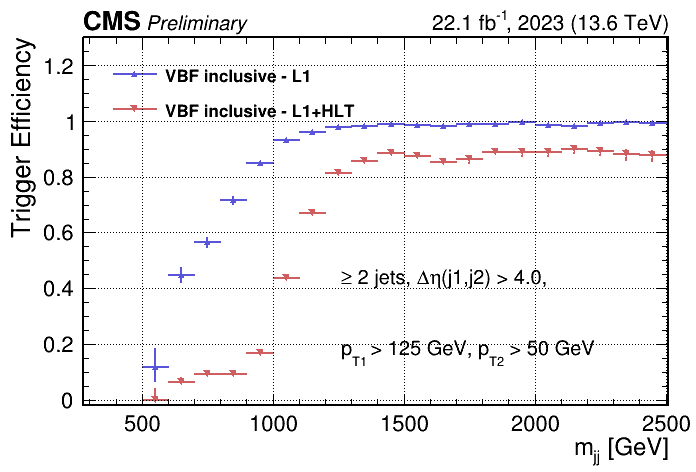

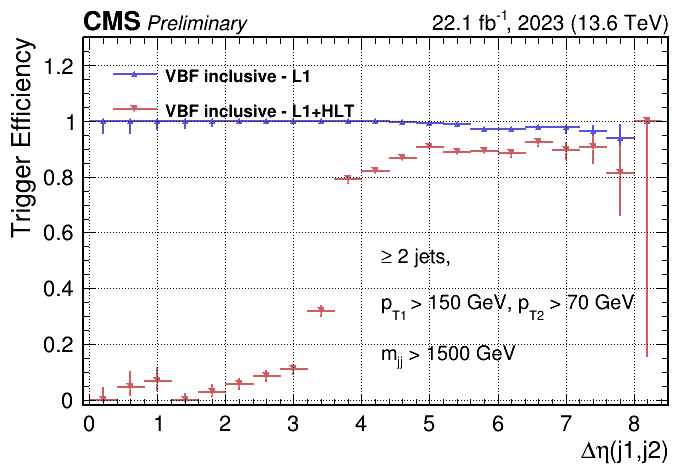

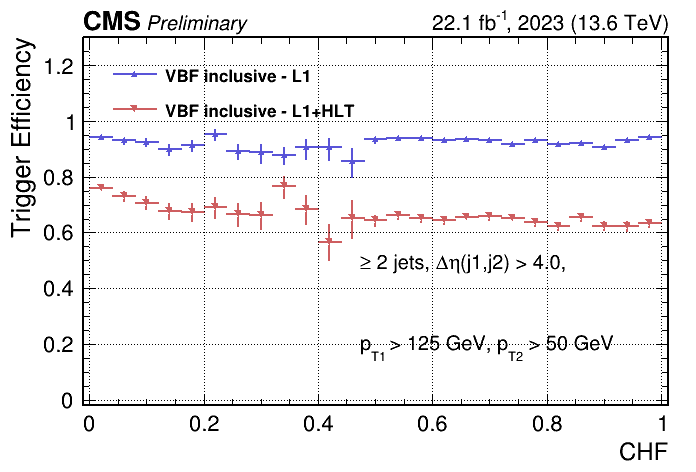

In [138]:
#theVar = 'mjj'
theYear = "23mc"

#for theVar in ['mjj','detajj','MET']:
text_coord = {
    'mjj' :    [1200,0.04,2400,0.57],
    'detajj' : [4.1,0.07,7.95,0.6],
    'MET' :    [170,0.04,390,0.64],
    'chf' :    [0.45,0.04,0.92,0.64]
    
}
for theVar in ['mjj','detajj','chf']:
#for theYear in ["23mc"]:    
    Eff[theYear][theVar]['new'].SetLineColor(46)
    Eff[theYear][theVar]['new'].SetMarkerColor(46)
    Eff[theYear][theVar]['new'].SetLineWidth(2)
    Eff[theYear][theVar]['new'].SetMarkerStyle(23)   
    
    Eff[theYear][theVar]['L1'].SetLineColor(9)
    Eff[theYear][theVar]['L1'].SetMarkerColor(9)
    Eff[theYear][theVar]['L1'].SetLineWidth(2)
    Eff[theYear][theVar]['L1'].SetMarkerStyle(22)   
        
    path[theVar] = ROOT.TPaveText(text_coord[theVar][0],
                                  text_coord[theVar][1],
                                  text_coord[theVar][2],
                                  text_coord[theVar][3])
    
    path[theVar].SetTextAlign(12)
    path[theVar].SetFillStyle(0)
    path[theVar].SetBorderSize(0)
    
    #path[theVar].AddText('Offline selection:')
    if not 'deta' in theVar:
        path[theVar].AddText('#geq 2 jets, #Delta#eta(j1,j2) > 4.0,')
        path[theVar].AddText('p_{T1} > 125 GeV, p_{T2} > 50 GeV ') 
        #path[theVar].AddText(add_cut_label[theVar])
    else:
        path[theVar].AddText('#geq 2 jets,')
        path[theVar].AddText('p_{T1} > 150 GeV, p_{T2} > 70 GeV ') 
        path[theVar].AddText('m_{jj} > 1500 GeV')
        #path[theVar].AddText(add_cut_label[theVar])
        
    #path[theVar].AddText('Ref.: IsoMu24, #geq 1#mu (tight ID, pT > 30 GeV) ')
    
    
    
    canvas[theVar]=ROOT.TCanvas(theVar,"Trigger Efficicency")
    canvas[theVar].SetFillColor(0)
    canvas[theVar].SetBorderMode(0)
    canvas[theVar].SetFrameFillStyle(0)
    canvas[theVar].SetFrameBorderMode(0)
    canvas[theVar].SetLeftMargin( L/W )
    canvas[theVar].SetRightMargin( R/W )
    canvas[theVar].SetTopMargin( T/H )
    canvas[theVar].SetBottomMargin( B/H )
    canvas[theVar].SetTickx()
    canvas[theVar].SetTicky()
    canvas[theVar].SetGrid()
    
    canvas[theVar].cd()
    
    
    #path[theYear] = ROOT.TPaveText(text_coord[theVar][0],
    #                              text_coord[theVar][1],
    #                              text_coord[theVar][2],
    #                              text_coord[theVar][3])
    #
    #path[theYear].SetTextAlign(12)
    #path[theYear].SetFillStyle(0)
    #path[theYear].SetBorderSize(0)
    #
    ##path[theVar].AddText('Offline selection:')
    #path[theYear].AddText('#geq 2 jets, #Delta#eta(j1,j2) > 4.0,')
    #path[theYear].AddText('p_{T1} > 125 GeV, p_{T2} > 50 GeV ') 
    #path[theYear].AddText(add_cut_label[theVar])
    ##path[theVar].AddText('Ref.: IsoMu24, #geq 1#mu (tight ID, pT > 30 GeV) ')
    #
    #
    #
    #canvas[theYear]=ROOT.TCanvas(theYear,"Trigger Efficicency")
    #canvas[theYear].SetFillColor(0)
    #canvas[theYear].SetBorderMode(0)
    #canvas[theYear].SetFrameFillStyle(0)
    #canvas[theYear].SetFrameBorderMode(0)
    #canvas[theYear].SetLeftMargin( L/W )
    #canvas[theYear].SetRightMargin( R/W )
    #canvas[theYear].SetTopMargin( T/H )
    #canvas[theYear].SetBottomMargin( B/H )
    #canvas[theYear].SetTickx()
    #canvas[theYear].SetTicky()
    #canvas[theYear].SetGrid()
    #
    #canvas[theYear].cd()
    
    
    
    #dummy hist for consistent display
    xlow=Eff[theYear][theVar]['L1'].GetXaxis().GetBinLowEdge(0)
    xhigh=Eff[theYear][theVar]['L1'].GetXaxis().GetBinUpEdge(92)
    
    hpx[theVar] = ROOT.TH2F("hpx","",10,xlow,xhigh,10,-0.02,1.3)
    hpx[theVar].SetStats(False)
    hpx[theVar].SetTitle(theVar)
    hpx[theVar].GetXaxis().SetTitle(VARLABELS[theVar])
    hpx[theVar].GetYaxis().SetTitle("Trigger Efficiency")
    hpx[theVar].GetXaxis().SetTitleSize(0.055)
    hpx[theVar].GetXaxis().SetTitleOffset(1.1)
    hpx[theVar].GetYaxis().SetTitleSize(0.06)
    hpx[theVar].GetYaxis().SetTitleOffset(0.9)
    hpx[theVar].Draw()
    
    #hpx[theYear] = ROOT.TH2F("hpx","",10,xlow,xhigh,10,-0.02,1.3)
    #hpx[theYear].SetStats(False)
    #hpx[theYear].SetTitle(theVar)
    #hpx[theYear].GetXaxis().SetTitle(VARLABELS[theVar])
    #hpx[theYear].GetYaxis().SetTitle("Trigger Efficiency")
    #hpx[theYear].GetXaxis().SetTitleSize(0.055)
    #hpx[theYear].GetXaxis().SetTitleOffset(1.1)
    #hpx[theYear].GetYaxis().SetTitleSize(0.06)
    #hpx[theYear].GetYaxis().SetTitleOffset(0.9)
    #hpx[theYear].Draw()
    
    
    legend[theVar] = ROOT.TLegend(0.15,0.73,0.5,0.88) # top left
    legend[theVar].SetTextSize(0.04)
    legend[theVar].SetFillStyle(0)
    legend[theVar].SetBorderSize(0)
    legend[theVar].AddEntry(Eff[theYear][theVar]['L1'],   'VBF inclusive - L1',    'lp')
    legend[theVar].AddEntry(Eff[theYear][theVar]['new'],  'VBF inclusive - L1+HLT','lp')
    
    #legend[theYear] = ROOT.TLegend(0.15,0.73,0.5,0.88) # top left
    #legend[theYear].SetTextSize(0.04)
    #legend[theYear].SetFillStyle(0)
    #legend[theYear].SetBorderSize(0)
    #legend[theYear].AddEntry(Eff[theYear][theVar]['L1'],   'VBF inclusive - L1',    'lp')
    #legend[theYear].AddEntry(Eff[theYear][theVar]['new'],  'VBF inclusive - L1+HLT','lp')
    
    
    path[theVar].SetTextSize(0.045);
    #path[theYear].SetTextSize(0.045);
    
    Eff[theYear][theVar]['L1'].Draw("p same")
    Eff[theYear][theVar]['new'].Draw("p same")
    
    legend[theVar].Draw("same")
    path[theVar].Draw("same")
    canvas[theVar].Update()
    CMS_lumi.CMS_lumi(canvas[theVar], iPeriod, iPos)
    #legend[theYear].Draw("same")
    #path[theYear].Draw("same")
    #canvas[theYear].Update()
    #CMS_lumi.CMS_lumi(canvas[theYear], iPeriod, iPos)
    
    redrawBorder()
    
    canvas[theVar].Draw()
    #canvas[theYear].Draw()
    
    canvas[theVar].SaveAs("./DPSplots/VBFincl_L1HLT_{}.DataTest_modCuts2_chfFalse_forDPS.pdf".format(theVar))
    canvas[theVar].SaveAs("./DPSplots/VBFincl_L1HLT_{}.DataTest_modCuts2_chfFalse_forDPS.png".format(theVar))
    canvas[theVar].SaveAs("./DPSplots/VBFincl_L1HLT_{}.DataTest_modCuts2_chfFalse_forDPS.root".format(theVar))
    
    #canvas[theVar].SaveAs("./DPSplots/23C_vs_23D_VBFincl_{}.selCompCHFcut.data.pdf".format(theVar))
    #canvas[theVar].SaveAs("./DPSplots/23C_vs_23D_VBFincl_{}.selCompCHFcut.data.png".format(theVar))

In [ ]:

text_coord = {
    'mjj' :    [1200,0.07,2400,0.6],
    'detajj' : [4.1,0.07,7.95,0.6],
    'MET' :    [170,0.04,390,0.64]
    
}

In [ ]:
theYear = "23all"
#for mjj in ['mjj','detajj','MET']:
text_coord = {
    'mjj' :    [1200,0.07,2400,0.6],
    'detajj' : [4.1,0.07,7.95,0.6],
    'MET' :    [170,0.04,390,0.64]
    
}


Eff['23all']['mjj']['new'].SetLineColor(46)
Eff['23all']['mjj']['new'].SetMarkerColor(46)
Eff['23all']['mjj']['new'].SetLineWidth(2)
Eff['23all']['mjj']['new'].SetMarkerStyle(23)   

Eff['23all']['mjj1']['new'].SetLineColor(9)
Eff['23all']['mjj1']['new'].SetMarkerColor(9)
Eff['23all']['mjj1']['new'].SetLineWidth(2)
Eff['23all']['mjj1']['new'].SetMarkerStyle(22)   

Eff['23all']['mjj2']['new'].SetLineColor(8)
Eff['23all']['mjj2']['new'].SetMarkerColor(8)
Eff['23all']['mjj2']['new'].SetLineWidth(2)
Eff['23all']['mjj2']['new'].SetMarkerStyle(21)   
    
path['mjj'] = ROOT.TPaveText(text_coord['mjj'][0],
                             text_coord['mjj'][1],
                             text_coord['mjj'][2],
                             text_coord['mjj'][3])

path['mjj'].SetTextAlign(12)
path['mjj'].SetFillStyle(0)
path['mjj'].SetBorderSize(0)

path['mjj'].AddText('Offline selection:')
path['mjj'].AddText('> 1 ak4 jets (tight ID), ')
path['mjj'].AddText('p_{T1}>125 GeV, p_{T2}>50 GeV, ') 
path['mjj'].AddText(add_cut_label['mjj'])
path['mjj'].AddText('Ref.: IsoMu27, #geq 1#mu (tight ID, pT > 30 GeV) ')
    

#legend['mjj'] = ROOT.TLegend(0.65,0.75,0.90,0.90) # top right
legend['mjj'] = ROOT.TLegend(0.15,0.72,0.55,0.88) # top left
legend['mjj'].SetFillStyle(0)
legend['mjj'].SetBorderSize(0)
legend['mjj'].AddEntry(Eff['23all']['mjj']['new'],   'base selection',    'lp')
legend['mjj'].AddEntry(Eff['23all']['mjj1']['new'],  'no ptj2 requirement prior to mjj eval','lp')
legend['mjj'].AddEntry(Eff['23all']['mjj2']['new'],  'no ptj requirement prior to mjj eval','lp')


canvas['mjj']=ROOT.TCanvas('mjj',"Trigger Efficicency")
canvas['mjj'].SetFillColor(0)
canvas['mjj'].SetBorderMode(0)
canvas['mjj'].SetFrameFillStyle(0)
canvas['mjj'].SetFrameBorderMode(0)
canvas['mjj'].SetLeftMargin( L/W )
canvas['mjj'].SetRightMargin( R/W )
canvas['mjj'].SetTopMargin( T/H )
canvas['mjj'].SetBottomMargin( B/H )
canvas['mjj'].SetTickx()
canvas['mjj'].SetTicky()
canvas['mjj'].SetGrid()

canvas['mjj'].cd()

#dummy hist for consistent display
xlow=Eff[theYear]['mjj']['new'].GetXaxis().GetBinLowEdge(0)
xhigh=Eff[theYear]['mjj']['new'].GetXaxis().GetBinUpEdge(92)
#hpx['mjj'] = ROOT.TH2F("hpx","",10,xlow,xhigh,10,-0.02,1.3);
hpx['mjj'] = ROOT.TH2F("hpx","",10,0,2500,10,-0.02,1.3);
hpx['mjj'].SetStats(False)

hpx['mjj'].SetTitle('mjj')
hpx['mjj'].GetXaxis().SetTitle(VARLABELS['mjj'])
hpx['mjj'].GetYaxis().SetTitle("Trigger Efficiency")
hpx['mjj'].GetXaxis().SetTitleSize(0.055)
hpx['mjj'].GetXaxis().SetTitleOffset(1.1)
hpx['mjj'].GetYaxis().SetTitleSize(0.06)
hpx['mjj'].GetYaxis().SetTitleOffset(0.9)
hpx['mjj'].Draw()
Eff['23all']['mjj']['new'].Draw("p same")
Eff['23all']['mjj1']['new'].Draw("p same")
Eff['23all']['mjj2']['new'].Draw("p same")
legend['mjj'].Draw("same")
path['mjj'].Draw("same")
canvas['mjj'].Update()
CMS_lumi.CMS_lumi(canvas['mjj'], iPeriod, iPos)
redrawBorder()
canvas['mjj'].Draw()
canvas['mjj'].SaveAs("./DPSplots/23C_vs_23D_VBFincl_{}.selCompCHFcut.pdf".format('mjj'))
canvas['mjj'].SaveAs("./DPSplots/23C_vs_23D_VBFincl_{}.selCompCHFcut.png".format('mjj'))

In [ ]:
xhigh

In [35]:
Eff['23all']['mjj2']['new'].Draw("p")